 - make a conda environment specific for swotsimulator :
```conda create --name python3.5; conda activate python3.5; conda install python=3.5,scipy,netCDF4 ```   
 - copy swotsimulator from Laura : /mnt/alberta/equipes/IGE/meom/workdir/gomeznl/git/swotsimulator/swotsimulator (without the params, swot_output, nohup
 - python setup.py install
 - separate files in hourly files : in /media/extra/DATA/eNATL60/eNATL60-BLBT02-S/1h/GM : 

``` for file in $(ls eNATL60GM-BLBT02_y2009m09d??.1h_SSH.nc); do for hour in $(seq 1 24); do hh=$(printf "%02d" $hour); fileh=$(echo $file | sed "s/\.1h/h${hh}/g"); echo $fileh; ncks -F -d time_counter,$hour,$hour $file $fileh; done; done ```

 - apply mask from eNATL60GM_mask.nc to have one valaue only for coastal areas :
 
```ncwa -O -C -v tmask -a z eNATL60GM_mask.nc eNATL60GM_mask_noz.nc; nccopy -k nc3 eNATL60GM_mask_noz.nc eNATL60GM_mask_noz_nc3.nc; ncrename -d t,time_counter eNATL60GM_mask_noz_nc3.nc ```
 
``` for file in $(ls eNATL60GM-BLBT02_y2009m??d??h??_SSH.nc); do filem=$(echo $file | sed "s/SSH/SSHm/g"); cp $file $filem; ncks -A -v tmask eNATL60GM_mask_noz_nc3.nc $filem; ncap2 -O -s 'where(tmask != 1) sossheig=sossheig@_FillValue' $filem $filem; done ```

  - make a list of files, in /media/extra/DATA/eNATL60/eNATL60-BLBT02-S/1h/GM:
  
 ```ls -l eNATL60GM-BLBT02_y2009m??d??h??_SSHm.nc | awk '{print $9}' > list_files.txt```
 
  - adapt the param file from Laura's params_eNAtl60_wmed_ASO_wT.py
  - ```swotsimulator params_eNATL60-BLBT02-GM.py```
 

In [8]:
import xarray as xr

In [31]:
ds=xr.open_mfdataset('/media/extra/DATA/eNATL60/eNATL60-BLBT02-S/1h/GM/swotsim/eNATL60-BLBT02-GM_calval_c01_p020.nc')

In [13]:
ds.lon

<xarray.DataArray 'lon' (time: 1804, nC: 52)>
dask.array<shape=(1804, 52), dtype=float64, chunksize=(1804, 52)>
Dimensions without coordinates: time, nC
Attributes:
    units:      deg
    long_name:  Longitude
    valid_min:  0
    valid_max:  359999999

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [32]:
ds.lon.values

array([[29.297912, 29.318542, 29.339172, ..., 30.497132, 30.517852,
        30.538574],
       [29.302094, 29.322724, 29.343354, ..., 30.501098, 30.52182 ,
        30.542542],
       [29.306274, 29.326904, 29.347534, ..., 30.505066, 30.525788,
        30.546508],
       ...,
       [34.860688, 34.87848 , 34.89624 , ..., 35.891844, 35.909636,
        35.9274  ],
       [34.86328 , 34.881072, 34.898836, ..., 35.894472, 35.912232,
        35.930024],
       [34.865876, 34.883668, 34.901428, ..., 35.897064, 35.914824,
        35.932616]])

In [33]:
ds.lat.values

array([[31.407184, 31.410752, 31.414314, ..., 31.608554, 31.611928,
        31.615298],
       [31.389544, 31.393108, 31.396672, ..., 31.590874, 31.594248,
        31.597616],
       [31.371894, 31.37546 , 31.37902 , ..., 31.573202, 31.576574,
        31.579944],
       ...,
       [-0.546181, -0.543586, -0.540991, ..., -0.395599, -0.393001,
        -0.390404],
       [-0.563992, -0.561397, -0.558802, ..., -0.413409, -0.410812,
        -0.408214],
       [-0.581803, -0.579208, -0.576614, ..., -0.43122 , -0.428623,
        -0.426025]])

In [34]:
ds.ssh_obs.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

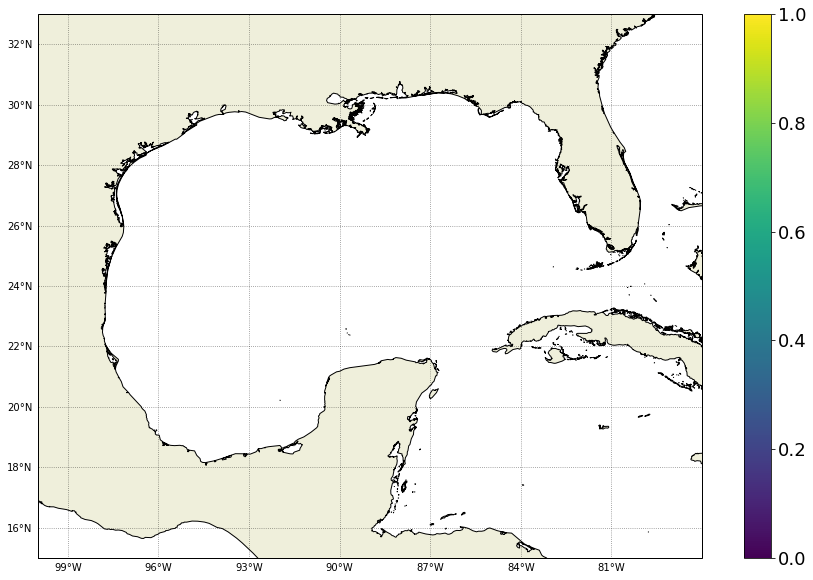

In [30]:
fig = plt.figure(figsize=(15,10))

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.set_extent([-100, -78, 15, 33])         

land = cfeature.GSHHSFeature(scale='intermediate',
                                 levels=[1],
                                 facecolor=cfeature.COLORS['land'])
ax.add_feature(land)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                      alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

plt.scatter(ds.lon.values,ds.lat.values,c=ds.ssh_obs.values, s=15)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=18)

In [4]:
ds=xr.open_mfdataset('/media/extra/DATA/eNATL60/eNATL60-BLBT02-S/1h/GM/eNATL60GM-BLBT02_y2009m09d??.1h_SSH.nc')

In [5]:
ds.sossheig.mean(dim='time_counter').plot()

/home/alberta/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [6]:
import sys
sys.path.insert(0,"/home/alberta/Work/git/swotsimulator")
import swotsimulator

In [7]:
import swotsimulator.run_simulator

AttributeError: module 'swotsimulator' has no attribute 'run_simulator'